In [ ]:
import mlflow
import lightning as L
from torchmetrics import MetricCollection
import torchmetrics.regression as re

from hympi_ml.utils import mlf
from hympi_ml.model import MLPModel
from hympi_ml.data.batches import RawDataModule


tracking_uri = "/explore/nobackup/people/dgershm1/mlruns"
mlflow.set_tracking_uri(tracking_uri)

run_id = "f0eb2e401350499e8981bee7fdfddc97"
cpath = mlf.get_checkpoint_path(run_id)

model = MLPModel.load_from_checkpoint(cpath)
raw_data = RawDataModule.load_from_checkpoint(cpath)

# model.test_metrics = {
#     "TEMPERATURE": MetricCollection(
#         {
#             "mae_profile": re.MeanAbsoluteError(num_outputs=72),
#         }
#     )
# }

# trainer = L.Trainer(enable_progress_bar=True)

# raw_data.num_workers = 5
# loader = raw_data.test_dataloader()

# model.log_metrics = False
# model.unscale_metrics = True

# trainer.test(model, dataloaders=loader)

# computed_metrics = model.test_metrics["TEMPERATURE"].compute()
# print(computed_metrics)

[('feature_paths.CH.0.weight', torch.Size([1024, 6143])), ('feature_paths.CH.0.bias', torch.Size([1024])), ('feature_paths.CH.2.weight', torch.Size([256, 1024])), ('feature_paths.CH.2.bias', torch.Size([256])), ('feature_paths.CH.4.weight', torch.Size([128, 256])), ('feature_paths.CH.4.bias', torch.Size([128])), ('output_paths.TEMPERATURE.0.0.weight', torch.Size([128, 128])), ('output_paths.TEMPERATURE.0.0.bias', torch.Size([128])), ('output_paths.TEMPERATURE.0.2.weight', torch.Size([128, 128])), ('output_paths.TEMPERATURE.0.2.bias', torch.Size([128])), ('output_paths.TEMPERATURE.1.weight', torch.Size([72, 128])), ('output_paths.TEMPERATURE.1.bias', torch.Size([72]))]


/explore/nobackup/people/dgershm1/hympi-ml-retrieval/.venv/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'feature_paths' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['feature_paths'])`.
/explore/nobackup/people/dgershm1/hympi-ml-retrieval/.venv/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'output_path' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_path'])`.


(6143,)

In [7]:
import numpy as np
from hympi_ml.data import CosmirhSpec, cosmirh

ch = CosmirhSpec(
    frequencies=[
        cosmirh.C50_BAND,
        cosmirh.C183_BAND,
    ],
    ignore_frequencies=[  # problematic CRTM frequencies
        56.96679675,
        57.60742175,
        57.611328,
        57.61523425,
    ],
)
ch.shape

(6140,)

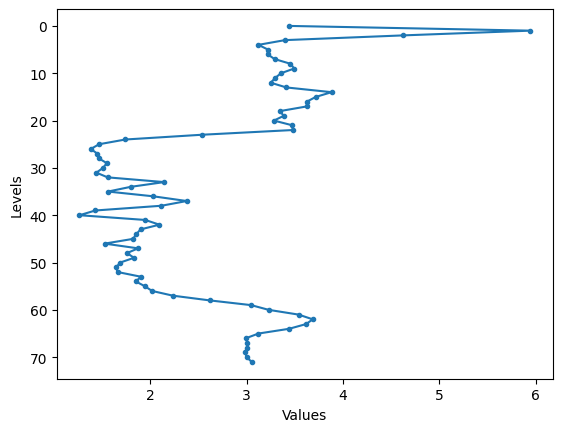

In [ ]:
import hympi_ml.evaluation.figs as figs
import matplotlib.pyplot as plt

figs.plot_profiles(computed_metrics)
plt.show()